Loading the dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
colors = sns.color_palette()

In [4]:
import os

userhome = os.path.expanduser('~')

heroes = pd.read_csv(userhome + r'/Documents/skillathon/superhero-set/heroes_information.csv')
powers = pd.read_csv(userhome + r'/Documents/skillathon/superhero-set/super_hero_powers.csv')

In [5]:
print(heroes.shape)
print(powers.shape)

(734, 11)
(667, 168)


In [6]:
heroes.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [7]:
heroes.loc[heroes['name']=='Superman','Alignment']

646    good
Name: Alignment, dtype: object

In [8]:
heroes.loc[heroes['name']=='Thanos','Alignment']

657    bad
Name: Alignment, dtype: object

In [9]:
heroes.Alignment.unique()

array(['good', 'bad', '-', 'neutral'], dtype=object)

In [10]:
heroes.Alignment.value_counts()

good       496
bad        207
neutral     24
-            7
Name: Alignment, dtype: int64

In [11]:
heroes.name.isna().sum()

0

In [12]:
!pwd

/Users/sdindukurti


In [13]:
heroes.drop(['Unnamed: 0'],axis=1,inplace=True)

In [14]:
heroes.head(2)

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0


In [15]:
heroes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.4+ KB


In [16]:
heroes.Publisher.isna().sum()

15

In [17]:
heroes.Weight.isna().sum()

2

In [18]:
heroes.replace(to_replace='-',value='unknown',inplace=True)

In [19]:
heroes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.4+ KB


In [20]:
heroes.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,unknown,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,unknown,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,unknown,bad,-99.0


In [21]:
heroes['Weight'].value_counts().index

Float64Index([-99.0,  79.0,  54.0,  81.0,  90.0,  52.0,  86.0,  59.0,  56.0,
               77.0,
              ...
               47.0,  78.0,  27.0,  25.0, 178.0, 132.0,  38.0, 412.0, 320.0,
              855.0],
             dtype='float64', length=135)

In [22]:
heroes[heroes.Weight.isnull()]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
286,Godzilla,unknown,unknown,Kaiju,unknown,108.0,NaN,grey,bad,NaN
389,King Kong,Male,yellow,Animal,Black,30.5,NaN,unknown,good,NaN


In [23]:
#replacing negative values in weights by NaN
heroes.replace(-99.0,np.NaN,inplace=True)

In [24]:
heroes.Weight.value_counts().index

Float64Index([ 54.0,  79.0,  81.0,  90.0,  52.0,  86.0,  59.0,  77.0,  56.0,
               61.0,
              ...
               27.0,  47.0, 178.0, 132.0,  25.0, 412.0,  38.0,  96.0, 320.0,
              855.0],
             dtype='float64', length=134)

In [25]:
ht_wt=heroes[['Height','Weight']]

In [26]:
#impute missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
x=imputer.fit_transform(ht_wt)
heroes_h_w=pd.DataFrame(x,columns=ht_wt.columns)

In [27]:
heroes_h_w.head()

,Height,Weight
0,203.0,441.0
1,191.0,65.0
2,185.0,90.0
3,203.0,441.0
4,183.0,81.0


In [28]:
heroes.columns

Index(['name', 'Gender', 'Eye color', 'Race', 'Hair color', 'Height',
       'Publisher', 'Skin color', 'Alignment', 'Weight'],
      dtype='object')

In [29]:
heroes_without_h_w=heroes.drop(['Height','Weight'],axis=1)
heroes=pd.concat([heroes_without_h_w,heroes_h_w],axis=1)

In [30]:
heroes.head(2)

,name,Gender,Eye color,Race,Hair color,Publisher,Skin color,Alignment,Height,Weight
0,A-Bomb,Male,yellow,Human,No Hair,Marvel Comics,unknown,good,203.0,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,Dark Horse Comics,blue,good,191.0,65.0


Some Insights

In [31]:
publisher_series=heroes['Publisher'].value_counts()

In [32]:
#distribution of publishers by publications
publishers=list(publisher_series.index)
publication = list((publisher_series/publisher_series.sum())*100)

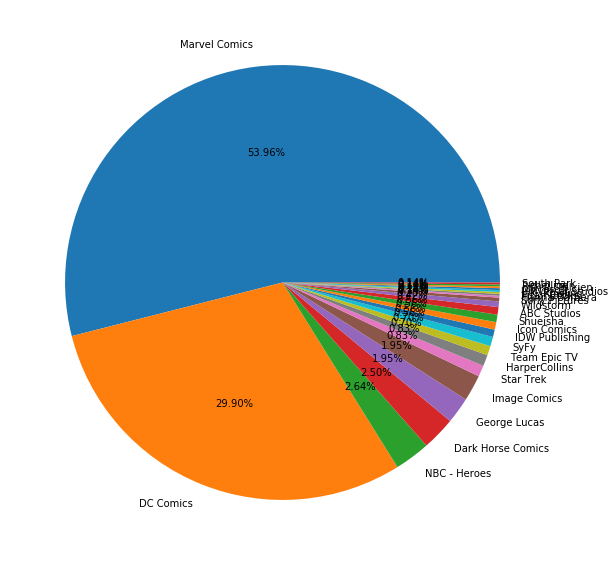

In [62]:
plt.pie(publication,labels=publishers,colors=colors,autopct='%1.2f%%')
#plt.figure(figsize=(20,18),dpi=100)
fig=plt.gcf()
fig.set_size_inches(20,10)
plt.show()

In [33]:
import plotly.offline as py
import plotly.graph_objs as go
from plotly import tools

py.init_notebook_mode(connected=True)

In [134]:
draw=go.Pie(labels=publishers,values=publication)
layout = go.Layout(
    title="%age of Publications by Publishers",
    height=650,
    width=650
)

data = [draw]
fig = go.Figure(data=data,layout=layout)
py.iplot([draw],filename='publisherpie')

In [34]:
heroes.loc[heroes['name']=='Deadpool']

,name,Gender,Eye color,Race,Hair color,Publisher,Skin color,Alignment,Height,Weight
212,Deadpool,Male,brown,Mutant,No Hair,Marvel Comics,unknown,neutral,188.0,95.0


In [35]:
heroes.Alignment.value_counts()

good       496
bad        207
neutral     24
unknown      7
Name: Alignment, dtype: int64

In [36]:
df=pd.DataFrame(columns=['Publishers','total-heroes','total-villans','total-neutral','total-unknown'])

for publisher in publishers:
    data=[]
    data.append(publisher)
    data.append(len(heroes.loc[(heroes['Alignment']=='good') & (heroes['Publisher']==publisher),'name']))
    data.append(len(heroes.loc[(heroes['Alignment']=='bad') & (heroes['Publisher']==publisher),'name']))
    data.append(len(heroes.loc[(heroes['Alignment']=='neutral') & (heroes['Publisher']==publisher),'name']))
    data.append(len(heroes.loc[(heroes['Alignment']=='unknown') & (heroes['Publisher']==publisher),'name']))

    df.loc[len(df)]=data

In [76]:
df

,Publishers,total-heroes,total-villans,total-neutral,total-unknown
0,Marvel Comics,259,115,11,3
1,DC Comics,142,59,13,1
2,NBC - Heroes,16,3,0,0
3,Dark Horse Comics,12,6,0,0
4,George Lucas,8,6,0,0
5,Image Comics,2,11,0,1
6,Star Trek,5,0,0,1
7,HarperCollins,6,0,0,0
8,Team Epic TV,4,1,0,0
9,SyFy,5,0,0,0


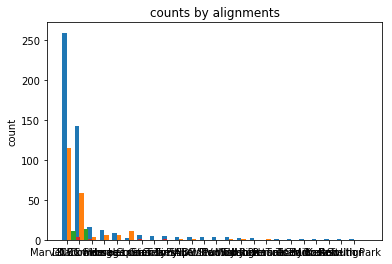

<Figure size 1296x864 with 0 Axes>

In [39]:
N=len(df)
idx=np.arange(N)
color_list=['g','r','b','o']
gap=0.35
plt.bar(idx, df['total-heroes'], label='heroes', width=gap)
plt.bar(idx + gap, df['total-villans'], label='villans', width=gap)
plt.bar(idx + (2 * gap), df['total-neutral'], label='neutral', width=gap)
plt.bar(idx + (3 * gap), df['total-unknown'], label='unknown', width=gap)

plt.ylabel('count')
plt.title('counts by alignments')

plt.xticks(idx + gap / 2, list(df['Publishers']))

plt.figure(figsize=(18,12))
plt.show()



In [41]:
# using plotly
block1 = go.Bar(
    x=list(df['Publishers']),
    y=list(df['total-heroes']),
    name='total-heroes'
)

block2 = go.Bar(
    x=list(df['Publishers']),
    y=list(df['total-villans']),
    name='total-villans'
)

block3 = go.Bar(
    x=list(df['Publishers']),
    y=list(df['total-neutral']),
    name='total-neutral'
)

block4 = go.Bar(
    x=list(df['Publishers']),
    y=list(df['total-unknown']),
    name='total-unknown'
)

data_obj = [block1,block2,block3,block4]
layout=go.Layout(
    title="count of characters by Allignment",
    barmode='group'
)

fig=go.Figure(data=data_obj,layout=layout)
py.iplot(fig,filename='count-of-characters')

There are more super heroes than required!!


In [42]:
heroes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Height        734 non-null float64
Weight        734 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.4+ KB


In [43]:
#gender distribution
gender_series=heroes['Gender'].value_counts()
genders=list(gender_series.index)
distribution=list((gender_series/gender_series.sum())*100)
draw=go.Pie(labels=genders,values=distribution)
layout=go.Layout(
    title='Overall gender wise distribution',
    height=600,
    width=600
    
)
data_obj=[draw]
fig=go.Figure(data=data_obj,layout=layout)
py.iplot(fig,filename='gender_wise_distribution')

In [44]:
#gender distribution by Alignment

heroes_gender_series = heroes['Gender'].loc[heroes['Alignment']=='good'].value_counts()
heroes_genders=list(heroes_gender_series.index)
heroes_distribution=list((heroes_gender_series/heroes_gender_series.sum())*100)

villans_gender_series = heroes['Gender'].loc[heroes['Alignment']=='bad'].value_counts()
villans_genders=list(villans_gender_series.index)
villans_distribution=list((villans_gender_series/villans_gender_series.sum())*100)


neutral_gender_series = heroes['Gender'].loc[heroes['Alignment']=='neutral'].value_counts()
neutral_genders=list(neutral_gender_series.index)
neutral_distribution=list((neutral_gender_series/neutral_gender_series.sum())*100)


unknown_gender_series = heroes['Gender'].loc[heroes['Alignment']=='unknown'].value_counts()
unknown_genders=list(unknown_gender_series.index)
unknown_distribution=list((unknown_gender_series/unknown_gender_series.sum())*100)




In [45]:
fig={
    "data":[
        {
        "labels":heroes_genders,
        "values":heroes_distribution,
        "type":"pie",
        "hole":0.4,
        "name": "Heroes",
        "domain":{"row":0,"column":0}
        },
        {
        "labels":villans_genders,
        "values":villans_distribution,
        "type":"pie",
        "hole":0.4,
        "name": "Villans",
        "domain":{"row":0,"column":1}
        },
        {
        "labels":neutral_genders,
        "values":neutral_distribution,
        "type":"pie",
        "hole":0.4,
        "name": "Neutral",
        "domain":{"row":1,"column":0}
        },
        {
        "labels":unknown_genders,
        "values":unknown_distribution,
        "type":"pie",
        "hole":0.4,
        "name": "Unknown",
        "domain":{"row":1,"column":1}
        }
    ],
    "layout":{
        "title":"Gender distribution by Alignment",
        "grid":{"rows":2,"columns":2},
        "annotations":[
            {"text":"Heroes","x":0.2,"y":0.8,"showarrow":False},
            {"text":"Villans","x":0.8,"y":0.8,"showarrow":False},
            {"text":"Neutral","x":0.2,"y":0.2,"showarrow":False},
            {"text":"Unknown","x":0.85,"y":0.2,"showarrow":False}
        ],
        "height":650,
        "width":650
    }
}
py.iplot(fig,filename="Gender distribution by Alignment ")



In [46]:
male_df=heroes.loc[heroes['Gender']=='Male']
female_df=heroes.loc[heroes['Gender']=='Female']

In [47]:
trace_m=go.Bar(x=male_df['Alignment'].value_counts().index,
              y=male_df['Alignment'].value_counts().values,
               name="male"
              )
trace_f=go.Bar(x=female_df['Alignment'].value_counts().index,
              y=female_df['Alignment'].value_counts().values,
               name="female"
              )
data_obj=[trace_m,trace_f]
layout=go.Layout(
title="characters by their gender by Alignment",
barmode='group')
fig=go.Figure(data=data_obj,layout=layout)
py.iplot(fig,filename="gender by Alignment")


In [48]:
trace=go.Bar(
    x=heroes['Race'].value_counts().index, 
    y=heroes['Race'].value_counts().values,
    name="Races"
)
layout=go.Layout(
    title="distribution across Races"

)
fig=go.Figure(data=[trace],layout=layout)
py.iplot(fig,filename='distribution across Races')

In [50]:
heroes['Hair color'].unique()

array(['No Hair', 'Black', 'Blond', 'Brown', 'unknown', 'White', 'Purple',
       'Orange', 'Pink', 'Red', 'Auburn', 'Strawberry Blond', 'black',
       'Blue', 'Green', 'Magenta', 'Brown / Black', 'Brown / White',
       'blond', 'Silver', 'Red / Grey', 'Grey', 'Orange / White',
       'Yellow', 'Brownn', 'Gold', 'Red / Orange', 'Indigo',
       'Red / White', 'Black / Blue'], dtype=object)

### Characters like Prof X (X-men)

In [49]:
heroes.loc[heroes['Hair color']=="No Hair","name"]

0                  A-Bomb
1              Abe Sapien
2                Abin Sur
3             Abomination
5           Absorbing Man
17                  Alien
28              Annihilus
31           Anti-Monitor
78          Beta Ray Bill
91                 Bishop
102       Black Lightning
104           Black Manta
112           Blaquesmith
120             Bloodhawk
121           Bloodwraith
135              Brainiac
189        Crimson Dynamo
203              Darkseid
207           Darth Vader
212              Deadpool
216            Demogoblin
227             Donatello
230          Doppelganger
231              Dormammu
232          Dr Manhattan
233    Drax the Destroyer
245               Etrigan
255         Fin Fang Foom
261                 Fixer
279           Ghost Rider
              ...        
428             Man-Thing
432     Martian Manhunter
446            Metamorpho
473                 Morph
479              Mysterio
487                Nebula
502         One Punch Man
504         

In [51]:
heroes['bald_or_not']=heroes['Hair color'].where(heroes['Hair color']=="No Hair",other="Hair")
heroes.head()


,name,Gender,Eye color,Race,Hair color,Publisher,Skin color,Alignment,Height,Weight,bald_or_not
0,A-Bomb,Male,yellow,Human,No Hair,Marvel Comics,unknown,good,203.0,441.0,No Hair
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,Dark Horse Comics,blue,good,191.0,65.0,No Hair
2,Abin Sur,Male,blue,Ungaran,No Hair,DC Comics,red,good,185.0,90.0,No Hair
3,Abomination,Male,green,Human / Radiation,No Hair,Marvel Comics,unknown,bad,203.0,441.0,No Hair
4,Abraxas,Male,blue,Cosmic Entity,Black,Marvel Comics,unknown,bad,183.0,81.0,Hair


In [52]:
trace=go.Bar(
    x = heroes['bald_or_not'].value_counts().index,
    y = heroes['bald_or_not'].value_counts().values,
    name='bald vs not bald',
    text=['not bald', 'bald']
)
layout=go.Layout(
    title="Bald Heroes"
)
fig=go.Figure(data=[trace],layout=layout)
py.iplot(fig,filename='Bald Heroes')


In [53]:
powers=powers*1

In [54]:
powers.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,A-Bomb,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Abe Sapien,1,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Abin Sur,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Abomination,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
powers.shape

(667, 168)

In [56]:
powers.loc[:, '#powers'] = powers.iloc[:, 1:].sum(axis=1)

In [57]:
powers.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,#powers
0,3-D Man,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1,A-Bomb,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,7
2,Abe Sapien,1,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,16
3,Abin Sur,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Abomination,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8


In [58]:
powerful_heroes=powers[['hero_names','#powers']]

In [59]:
powerful_heroes.head()

,hero_names,#powers
0,3-D Man,4
1,A-Bomb,7
2,Abe Sapien,16
3,Abin Sur,1
4,Abomination,8


In [60]:
powerful_heroes['#powers'].max()
#powerful_heroes['#powers'].min()

49

In [61]:
powerful_heroes.loc[powerful_heroes['#powers']==49]

,hero_names,#powers
563,Spectre,49


In [81]:
powerful_heroes=powerful_heroes.sort_values(by=['#powers'],ascending=False).head(20)

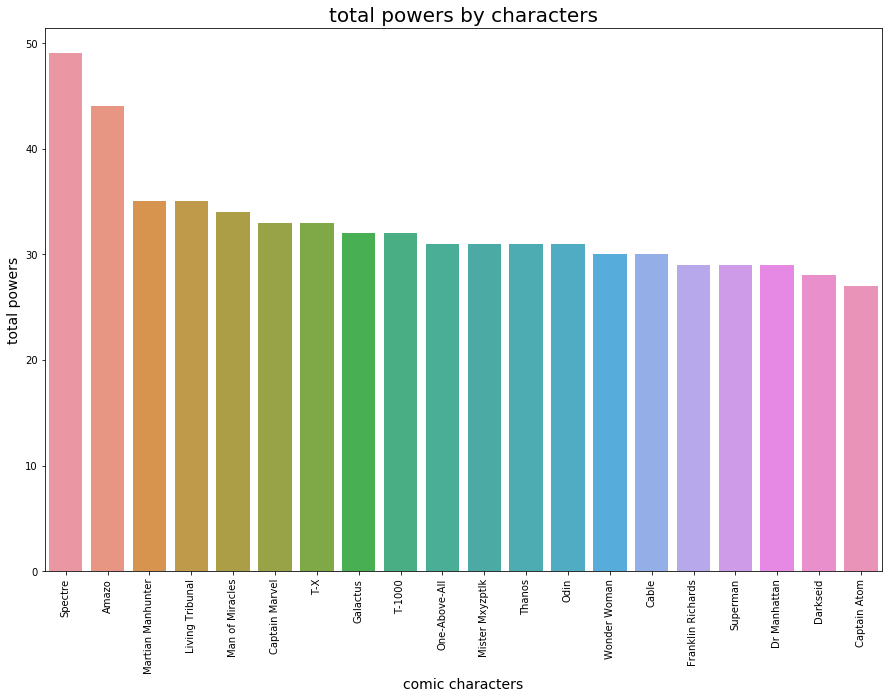

In [82]:
# using seaborn

plt.figure(figsize=(15,10))
sns.barplot(powerful_heroes['hero_names'], powerful_heroes['#powers'], alpha=1)
plt.title("total powers by characters", fontsize=20)
plt.xticks(rotation=90)
plt.ylabel("total powers", fontsize=14)
plt.xlabel("comic characters", fontsize=14)
plt.show()

In [83]:
# using plotly

trace = go.Bar(
    x=powerful_heroes['hero_names'],
    y=powerful_heroes['#powers'],
    text = ['names','total_powers']
)

layout = go.Layout(
    title = "comic character by total powers they have"
)

fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig, filename="most powerful superhero")

In [84]:


trace = go.Bar(
    x = powerful_heroes.head(20)['hero_names'],
    y = powerful_heroes.head(20)['#powers'],
    text = ['names', 'total_powers']
)

layout =go.Layout(
    title="top 20 most powerful heroes"
)

fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig, filename="top 20")

# Q1 - 5 Insights of my favorite Super Hero
My fav super hero is Wonder Woman. Lets analyze data for Wonder Woman and come with 5 insights

In [67]:
heroes.loc[heroes['name']=='Wonder Woman']

,name,Gender,Eye color,Race,Hair color,Publisher,Skin color,Alignment,Height,Weight,bald_or_not
722,Wonder Woman,Female,blue,Amazon,Black,DC Comics,unknown,good,183.0,74.0,Hair


In [68]:
powers.loc[powers['hero_names']=='Wonder Woman']

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,#powers
658,Wonder Woman,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,30


# Insight 1 - From the above bargraph - top 20 most powerful heroes, Its obvious that Wonder Woman is one of top 20 powerful heroes

In [69]:
heroes_powers = pd.merge(heroes,powers,how='outer',left_on=['name'],right_on=['hero_names'])

In [70]:
Femaleheroes10=heroes_powers.loc[heroes_powers['Gender']=='Female'].sort_values(by=['#powers'],ascending=False).head(10)

In [71]:

trace = go.Bar(
    x = Femaleheroes10['hero_names'],
    y = Femaleheroes10['#powers'],
    text = ['names', 'total_powers']
)

layout =go.Layout(
    title="top 10 most powerful Female heroes"
)

fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig, filename="top 10")

# Insight2 - Wonder Woman is ranked 3 in Female super heroes

In [117]:
trace = go.Bar(
    x = Femaleheroes10['hero_names'],
    y = Femaleheroes10['Publisher'],
    text = ['names', 'Publisher']
)

layout =go.Layout(
    title="top 10 most powerful Female heroes and their Publishers"
)

fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig, filename="top 10 heroes publisher")

# Insight3 - Wonder Woman is Published by DC Comics
# Insight4 - Wonder Woman is ranked 1 in DC Comics female heroes
# Insight 5 - Wonder Woman has 30 super powers

# Q2 - Find who can actually defeat Thanos without using any super power?

In [87]:
heroes.loc[heroes['name']=='Thanos']

,name,Gender,Eye color,Race,Hair color,Publisher,Skin color,Alignment,Height,Weight,bald_or_not
657,Thanos,Male,red,Eternal,No Hair,Marvel Comics,purple,bad,201.0,443.0,No Hair


In [103]:
heroes.loc[(heroes['Weight']>443.0) & (heroes['Alignment']=='good' )]
#heroes['bald_or_not']=heroes['Hair color'].where(heroes['Hair color']=="No Hair",other="Hair")

,name,Gender,Eye color,Race,Hair color,Publisher,Skin color,Alignment,Height,Weight,bald_or_not
331,Hulk,Male,green,Human / Radiation,Green,Marvel Comics,green,good,244.0,630.0,Hair
575,Sasquatch,Male,red,unknown,Orange,Marvel Comics,unknown,good,305.0,900.0,Hair
718,Wolfsbane,Female,green,unknown,Auburn,Marvel Comics,unknown,good,366.0,473.0,Hair


# Without using super power, Good heroes who weigh more than Thanos can defeat him. From above insights, Hulk, Sasquatch and Wolfsbane can defeat Thanos.

# Q3 - Top 3 heaviest characters who are also super agile. (agile means super active/quick)

In [104]:
superAgile=heroes_powers.loc[heroes_powers['Agility']==1].sort_values(by=['Weight'],ascending=False)
superAgile[['name','Gender','Weight','Agility']].head(3)

,name,Gender,Weight,Agility
575,Sasquatch,Male,900.0,1.0
203,Darkseid,Male,817.0,1.0
331,Hulk,Male,630.0,1.0


# Sasquatch, Darkseid and Hulk are 3 heaviest and super agile characters.



# Q4. calculate BMI index for each character? And find three Obese Super "hero" saving the world with a fat belly?
BMI=weights(kg)heights2(m2)
 
BMI           Body Status
-------------------------
below 19      Underweight
19 - 24       Normal
25 - 29       Overweight
30 and above  Obese

In [107]:
#Now, let's take a look at how the Height of the Characters vary with their Weights
trace = go.Scatter(
    x = heroes['Weight'],
    y = heroes['Height'],
    mode = 'markers'
)

data = [trace]

# Plot and embed in ipython notebook!
py.iplot(data, filename='Height vs Weight')

In [108]:
# there is a linear relationship between Height and Weight. Now, to calculate BMI, weight should be kg 
# and height should be in m. Given weights are in kg but heights are in cm


heroes_powers['BMI'] = np.divide(heroes_powers['Weight'], np.square(heroes_powers['Height']/100))

In [110]:
heroes_powers.head()

,name,Gender,Eye color,Race,Hair color,Publisher,Skin color,Alignment,Height,Weight,...,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,#powers,BMI
0,A-Bomb,Male,yellow,Human,No Hair,Marvel Comics,unknown,good,203.0,441.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,107.015458
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,Dark Horse Comics,blue,good,191.0,65.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,17.817494
2,Abin Sur,Male,blue,Ungaran,No Hair,DC Comics,red,good,185.0,90.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,26.296567
3,Abomination,Male,green,Human / Radiation,No Hair,Marvel Comics,unknown,bad,203.0,441.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,107.015458
4,Abraxas,Male,blue,Cosmic Entity,Black,Marvel Comics,unknown,bad,183.0,81.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,24.187046


In [116]:
heroes_powers.loc[(heroes_powers['BMI']>=30) & (heroes_powers['Alignment']=='good')].sort_values(by=['Weight','#powers'],ascending=False)

,name,Gender,Eye color,Race,Hair color,Publisher,Skin color,Alignment,Height,Weight,...,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,#powers,BMI
575,Sasquatch,Male,red,unknown,Orange,Marvel Comics,unknown,good,305.0,900.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,96.748186
331,Hulk,Male,green,Human / Radiation,Green,Marvel Comics,green,good,244.0,630.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,105.818328
718,Wolfsbane,Female,green,unknown,Auburn,Marvel Comics,unknown,good,366.0,473.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,35.310102
0,A-Bomb,Male,yellow,Human,No Hair,Marvel Comics,unknown,good,203.0,441.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,107.015458
614,Spawn,Male,brown,Demon,Black,Image Comics,unknown,good,211.0,405.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,90.968307
422,Machine Man,unknown,red,unknown,Black,Marvel Comics,unknown,good,183.0,383.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,114.365911
388,Kilowog,Male,red,Bolovaxian,No Hair,DC Comics,pink,good,234.0,324.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,59.171598
591,She-Hulk,Female,green,Human,Green,Marvel Comics,unknown,good,201.0,315.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,77.968367
233,Drax the Destroyer,Male,red,Human / Altered,No Hair,Marvel Comics,green,good,193.0,306.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,82.149856
498,Odin,Male,blue,God / Eternal,White,Marvel Comics,unknown,good,206.0,293.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,69.045150


# Sasquatch, Hulk and Wolfsbane are 3 obese super heroes that are going to save the world